<a href="https://colab.research.google.com/github/rodrigoruizteodoro/Actividad6_Regresi-nlinealmultipleynoineal/blob/main/Actividad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Actividad 6 (Regresión lineal múltiple y no lineal)


Rodrigo Ruiz Teodoro- A01730322

Natalia Cedillo Hernández - A01660022

Elena Nivón Hernández - A01174666

Jarlyn Loza Pacheco - A0176943

José Jaime Ponce de León - A01552256


**2.Agrega el archivo 'TrainingDataComplete**

In [ ]:
!pip install matplotlib

In [ ]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Cargar archivo
df=pd.read_csv("TrainingDataComplete.csv",index_col='Id')
df.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


**3. Acciones de procesamiento**

Identificación de valores nulos



In [ ]:
#Identificación de nulos
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Outliers

In [ ]:
#Separar variables númericas del resto
df2_numeric= df.select_dtypes(include=['int', 'float'])

In [ ]:
#Verificamos que solo tengamos variables tipo 'int' y 'float'
df2_numeric.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,
1,1303834,23,3,3,13,0
2,7574516,40,10,9,13,0
3,3991815,66,4,4,10,0
4,6256451,41,2,2,12,1
5,5768871,47,11,3,14,1


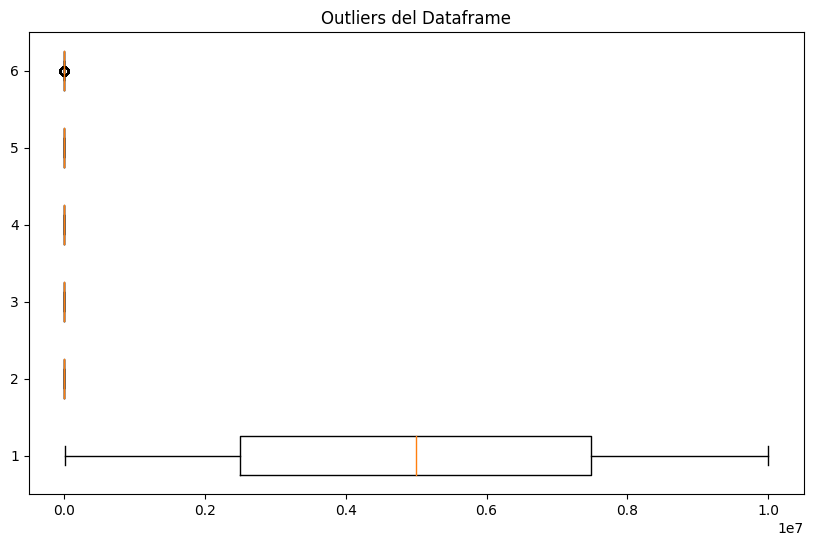

In [ ]:
#Diagrama de caja y bigote
fig=plt.figure(figsize=(10,6))
plt.boxplot(df2_numeric,vert=False)
plt.title("Outliers del Dataframe")
plt.show()

**4. Realizar la extracción de características de las siguientes columnas categóricas:**

(Age, Experience, Married/Single, House_Ownership, Profession, CITY, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS y Risk_Flag). Generar un análisis descriptivo de los hallazgos obtenidos empleando tablas y gráficos.

In [ ]:
#Creamos un nuevo df para solo trabajar con las variables categóricas
df_caracteristicas= df.loc[ : , ['Age', 'Experience', 'Married/Single','House_Ownership','Profession', 'CITY','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']]

In [ ]:
#Ordenamos valores
df_caracteristicas.sort_values(by='Age', inplace=True)

In [ ]:
#Cambiamos el tipo de datos de las siguientes columnas a 'category'  para comenzar con las extracción de caracteristicas
df_caracteristicas['Age']=df_caracteristicas['Age'].astype('category')
df_caracteristicas['Experience']=df_caracteristicas['Experience'].astype('category')
df_caracteristicas['CURRENT_JOB_YRS']=df_caracteristicas['CURRENT_JOB_YRS'].astype('category')
df_caracteristicas['CURRENT_HOUSE_YRS']=df_caracteristicas['CURRENT_HOUSE_YRS'].astype('category')
df_caracteristicas['Risk_Flag']=df_caracteristicas['Risk_Flag'].astype('category')

In [ ]:
#Verificamos los cambios
df_caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 41640 to 147713
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Age                252000 non-null  category
 1   Experience         252000 non-null  category
 2   Married/Single     252000 non-null  object  
 3   House_Ownership    252000 non-null  object  
 4   Profession         252000 non-null  object  
 5   CITY               252000 non-null  object  
 6   CURRENT_JOB_YRS    252000 non-null  category
 7   CURRENT_HOUSE_YRS  252000 non-null  category
 8   Risk_Flag          252000 non-null  category
dtypes: category(5), object(4)
memory usage: 10.8+ MB


**Extracción de características**

*Variable 'Age'*

In [ ]:
from funpymodeling.exploratory import freq_tbl

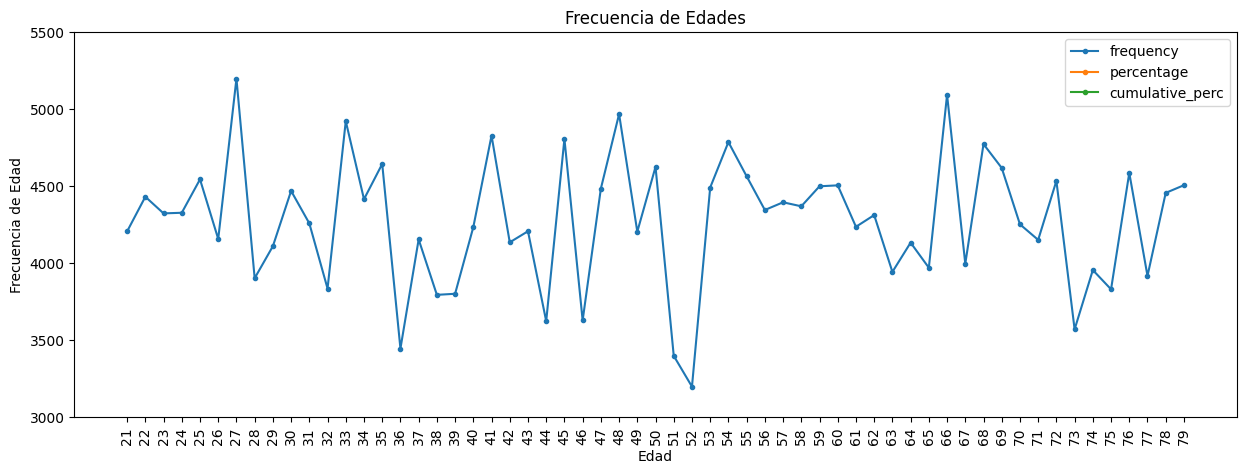

In [ ]:
#Se crea la tabla de frecuencias
table1= freq_tbl(df_caracteristicas['Age'])

#Fija un índice
Filtro1_index=table1.set_index('Age')

#Se ordenan los valores por el índice
Filtro1_index = Filtro1_index.sort_values(by='Age',ascending=True)

#Graficamos
Filtro1_index.plot(kind='line', marker='.', figsize=(15, 5))
plt.xticks(range(len(Filtro1_index)), Filtro1_index.index, rotation=90)
plt.title('Frecuencia de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de Edad')
plt.ylim(3000, 5500)
plt.show()

Variable 'Experience'

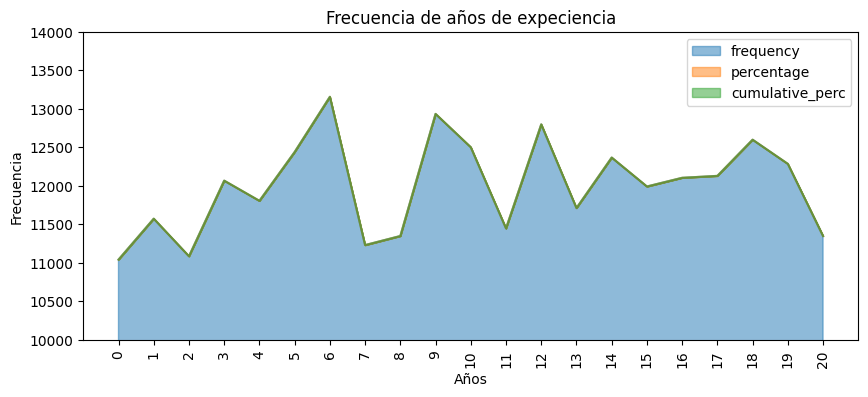

In [ ]:
#Se crea la tabla de frecuencias
table2= freq_tbl(df_caracteristicas['Experience'])

#Fija un índice
Filtro2_index=table2.set_index('Experience')

#Se ordenan los valores por el índice
Filtro2_index = Filtro2_index.sort_values(by='Experience',ascending=True)

#Se crea el gráfico
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
labels = Filtro2_index.index.tolist()
plt.xticks(range(len(labels)), labels, rotation=90)
plt.title('Frecuencia de años de expeciencia')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.ylim(10000, 14000)
plt.show()

Variable 'Married/Single'

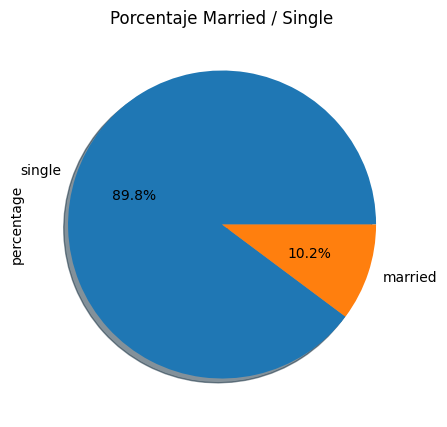

In [ ]:
#Se crea la tabla de frecuencias
table3= freq_tbl(df_caracteristicas['Married/Single'])

#Fija un índice
Filtro3_index=table3.set_index('Married/Single')

#Gráfico de Pie
Filtro3_index['percentage'].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f%%")
plt.title('Porcentaje Married / Single')
plt.show()

Variable 'House_Ownership'

Text(0, 0.5, 'Frecuencia')

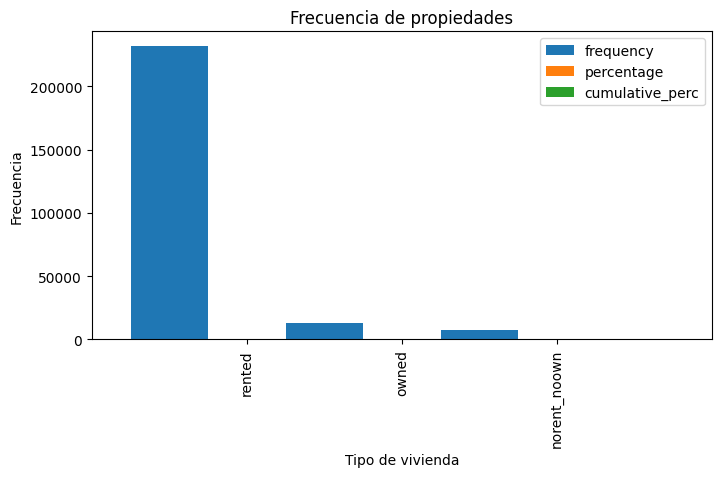

In [ ]:
#Se crea la tabla de frecuencias
table4= freq_tbl(df_caracteristicas['House_Ownership'])

#Fijamos indice
Filtro_index4= table4.set_index('House_Ownership')

#Grafica de barras
Filtro_index4.plot(kind = 'bar', width=1.5, figsize=(8,4))
plt.title('Frecuencia de propiedades')
plt.xlabel('Tipo de vivienda')
plt.ylabel('Frecuencia')

Variable 'Profession'

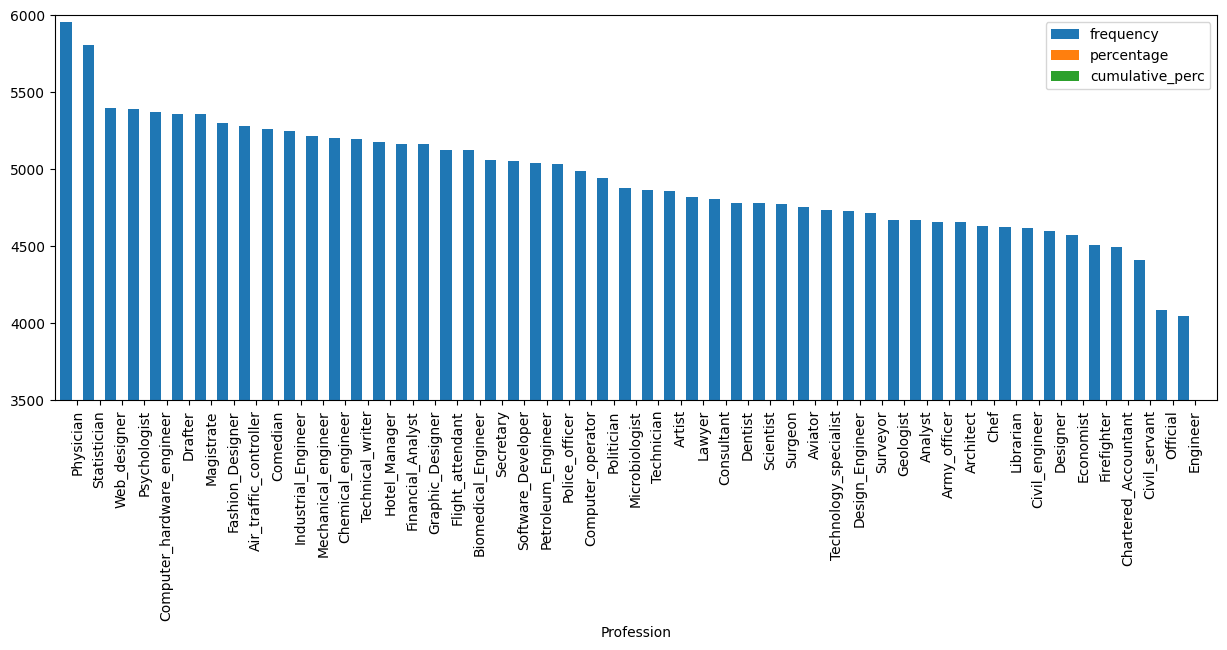

In [ ]:
#Se crea la tabla de frecuencias
table5= freq_tbl(df_caracteristicas['Profession'])

#Fijamos indice
Filtro_index5= table5.set_index('Profession')

#Gráfico de barras
Filtro_index5.plot(kind='bar', width=1.5, figsize=(15, 5))
plt.ylim(3500, 6000)
plt.show()

Variable "CITY"

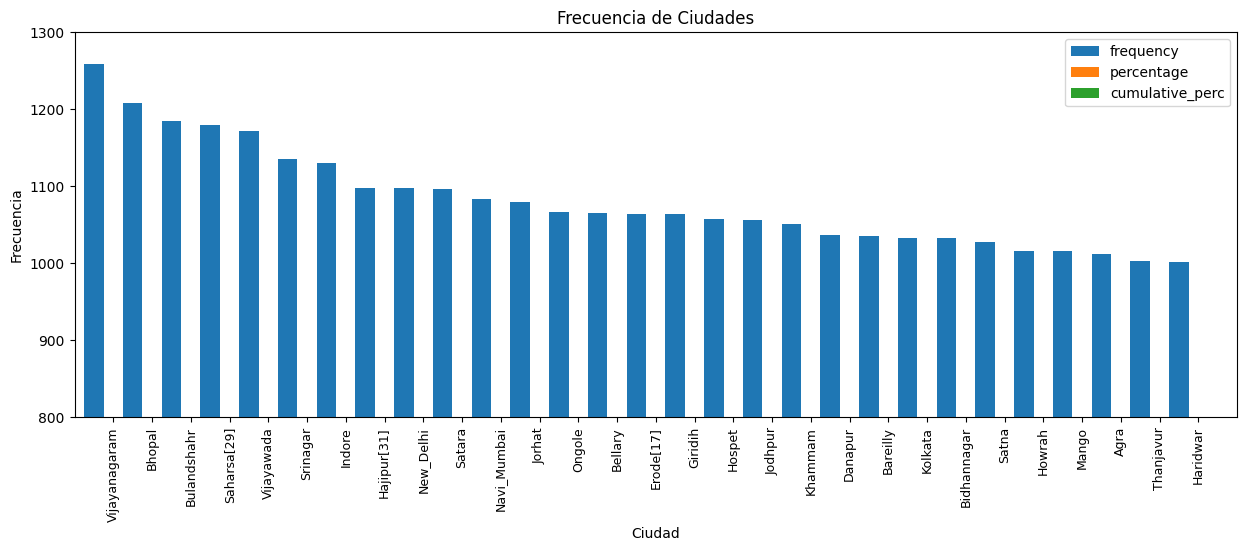

In [ ]:
#Se crea la tabla de frecuencias
table6= freq_tbl(df_caracteristicas['CITY'])

#Usamos un filtro para ver solo las ciudades con una frecuencia mayor a 1,000
table6 = table6[table6['frequency'] >= 1000]

#Fijamos indice
Filtro_index6= table6.set_index('CITY')

#Graficamos
Filtro_index6.plot(kind='bar', width=1.5, figsize=(15, 5))
plt.title('Frecuencia de Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.ylim(800, 1300)
plt.xticks(fontsize=9)
plt.show()

Variable 'CURRENT_JOB_YRS'

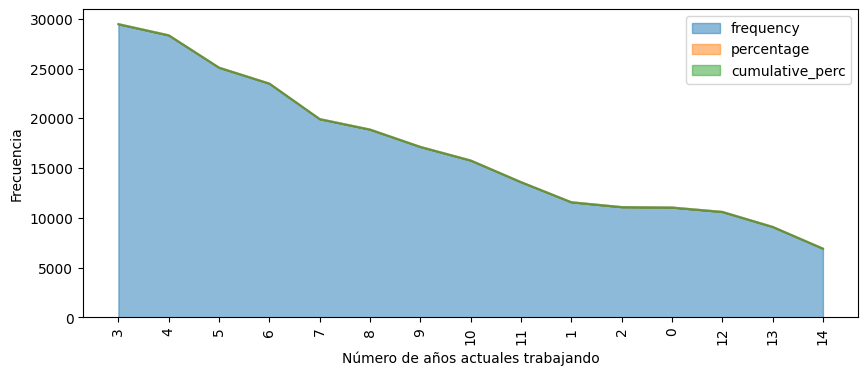

In [ ]:
#Se crea la tabla de frecuencias
table7= freq_tbl(df_caracteristicas['CURRENT_JOB_YRS'])

#Fijamos indice
Filtro7_index=table7.set_index('CURRENT_JOB_YRS')

#Gráfico de barras
Filtro7_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
labels = Filtro7_index.index.tolist()
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel('Número de años actuales trabajando')
plt.ylabel('Frecuencia')
plt.show()

Variable 'CURRENT_HOUSE_YRS'

                   frequency  percentage  cumulative_perc
CURRENT_HOUSE_YRS                                        
11                     51873    0.205845         0.205845
12                     51791    0.205520         0.411365
13                     50659    0.201028         0.612393
14                     49003    0.194456         0.806849
10                     48674    0.193151         1.000000


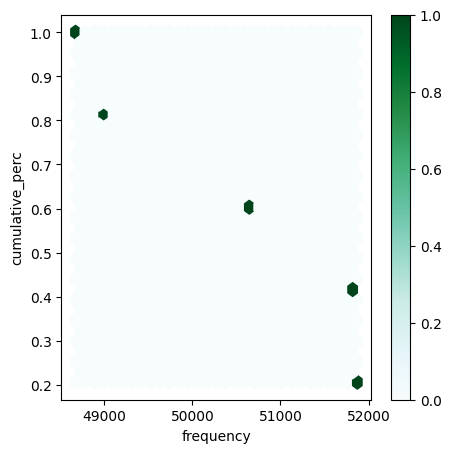

In [ ]:
#Se crea la tabla de frecuencias
table8= freq_tbl(df_caracteristicas['CURRENT_HOUSE_YRS'])

#Fijamos indice y se muestra la tabla de frecuencias de los años viviendo en su actual casa
Filtro8_index=table8.set_index('CURRENT_HOUSE_YRS')

#Realizamos grafico hexagonal
Filtro8_index.plot.hexbin("frequency", "cumulative_perc", figsize=(5,5),gridsize=30)
print(Filtro8_index)

Variable 'Risk_Flag'


           frequency  percentage  cumulative_perc
Risk_Flag                                        
0             221004       0.877            0.877
1              30996       0.123            1.000


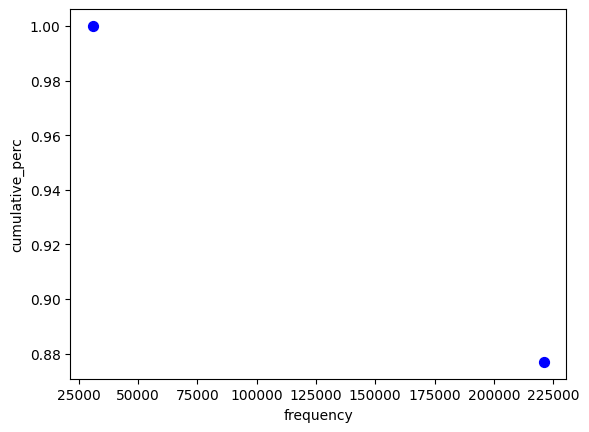

In [ ]:
#Se crea la tabla de frecuencias
table9= freq_tbl(df_caracteristicas['Risk_Flag'])

#Fijamos indice
Filtro_index9= table9.set_index('Risk_Flag')

#Scatterplot
Filtro_index9.plot("frequency", "cumulative_perc", kind="scatter",s=50, c='blue')
print(Filtro_index9)

**5.-Analizar la correlación que existe entre todas las variables numéricas del dataframe**:

 (Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS y Risk_Flag), mediante un mapa de calor y obtener los mejores 3 modelos de regresión lineal simple en conjunto con sus coeficientes de correlación y descripción.

In [ ]:
#Se hace un copia del df_numeric
df2_numeric2=df2_numeric.copy()

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df2_numeric2.corr()
Corr_Factors

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<Axes: >

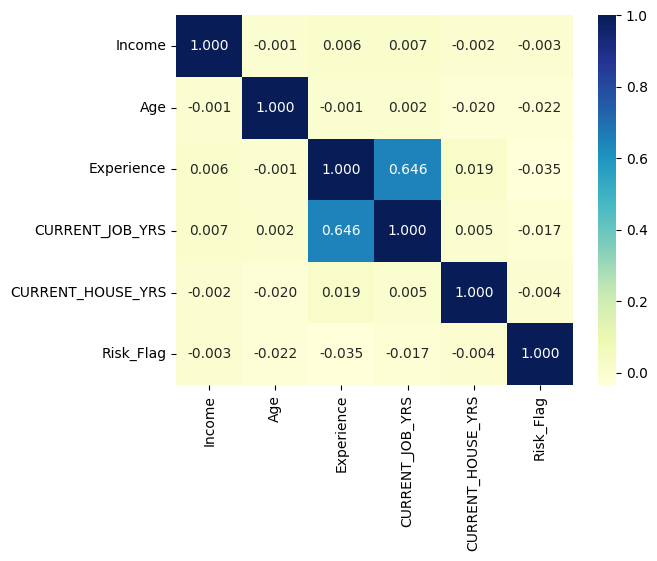

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors, cmap = 'YlGnBu', annot=True, fmt=".3f")
Heat_Map

*Mejor modelo de regresión lineal:*

1.-Experience y Current_job_yrs

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression ()

In [ ]:
#Areglo de vectores
#Una matriz, 2 o mas
var_indep=df2_numeric2[['Experience']]

#1 solo vector
var_dep=df2_numeric2[['CURRENT_JOB_YRS']]

#Creamos el modelo
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#Ajustamos modelo
model.fit(X=var_indep,y=var_dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Experience'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.39255587]]),
 'rank_': 1,
 'singular_': array([3013.27021025]),
 'intercept_': array([2.37517222])}

Modelo matemático

y= 0.39255587 x + 2.37517222

In [ ]:
y_pred=model.predict(X=df2_numeric2[['Experience']])
y_pred

array([[3.55283984],
       [6.30073094],
       [3.94539571],
       ...,
       [5.12306332],
       [2.37517222],
       [9.04862204]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df2_numeric2.insert(0,'Predicciones_CURRENT_JOB_YRS',y_pred)
df2_numeric2

,Predicciones_CURRENT_JOB_YRS,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,
1,3.552840,1303834,23,3,3,13,0
2,6.300731,7574516,40,10,9,13,0
3,3.945396,3991815,66,4,4,10,0
4,3.160284,6256451,41,2,2,12,1
5,6.693287,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251996,7.478399,8154883,43,13,6,11,0
251997,6.300731,2843572,26,10,6,11,0
251998,5.123063,4522448,46,7,7,12,0


<Axes: xlabel='Experience', ylabel='CURRENT_JOB_YRS'>

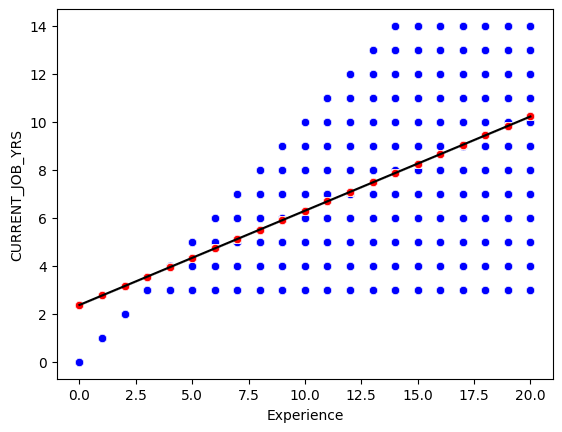

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Experience',y='CURRENT_JOB_YRS',color='blue',data=df2_numeric2)
sns.scatterplot(x='Experience',y='Predicciones_CURRENT_JOB_YRS',color='red',data=df2_numeric2)
sns.lineplot(x='Experience',y='Predicciones_CURRENT_JOB_YRS',color='black',data=df2_numeric2)

In [ ]:
coef_deter=model.score(X=var_indep,y=var_dep)
print("El coefienciente de determinación es:",coef_deter)
coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 0.4174420012200907
El coefienciente de correlación es: 0.6460975168038419


6.Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: (Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS y Risk_Flag), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor.

In [ ]:
#Crear una copia del dataframe para identificar el mejor modelo de regresión lineal multiple
df_multiple=df2_numeric.copy()
df_multiple.head(5)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,
1,1303834,23,3,3,13,0
2,7574516,40,10,9,13,0
3,3991815,66,4,4,10,0
4,6256451,41,2,2,12,1
5,5768871,47,11,3,14,1


In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

** Income

In [ ]:
#Se define varieble dependiente e independiente¡
#Areglo de vectores
Vars_Indep= df_multiple[['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
Var_Dep =df_multiple['Income']

In [ ]:
#Se genera modelo
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#Ajustamos modelo
model.fit(X=Vars_Indep,y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -119.60460679,  1570.49372642,  3901.45155326, -5146.0166579 ]),
 'rank_': 4,
 'singular_': array([8565.98351382, 3284.56484425, 1281.99339764,  701.97671005]),
 'intercept_': 5024283.389913392}

Modelo matemático Variable Dependiente 'Income'

y= -119.60460679x1 + 1570.49372642x2 +  3901.45155326x3 + -5146.0166579x4 + 5024283.389913392

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

6.231495095221362e-05

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred=model.predict(X=df_multiple[['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([4971050.10324344, 5003418.99033241, 4986817.10040466, ...,
       4995332.99506377, 4967441.01602863, 5013313.43842278])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df_multiple.insert(0, 'Predicciones_Income', y_pred)
df_multiple

,Predicciones_Income,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,
1,4.971050e+06,1303834,23,3,3,13,0
2,5.003419e+06,7574516,40,10,9,13,0
3,4.986817e+06,3991815,66,4,4,10,0
4,4.968571e+06,6256451,41,2,2,12,1
5,4.975598e+06,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251996,5.006359e+06,8154883,43,13,6,11,0
251997,5.003681e+06,2843572,26,10,6,11,0
251998,4.995333e+06,4522448,46,7,7,12,0


<Axes: xlabel='Age', ylabel='Income'>

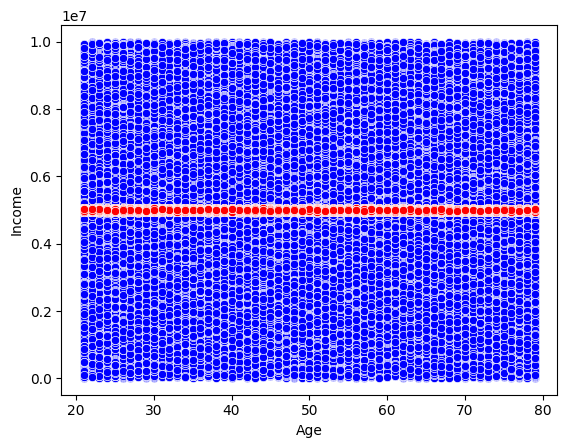

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='Age', y='Income', color="blue", data=df_multiple)
sns.scatterplot(x='Age', y='Predicciones_Income', color="red", data=df_multiple)

In [ ]:
coef_deter=model.score(X=Vars_Indep,y=Var_Dep)
print("El coefienciente de determinación es:",coef_deter)

coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 6.231495095221362e-05
El coefienciente de correlación es: 0.007893981945267777


** Age

In [ ]:
#Se define varieble dependiente e independiente
#Areglo de vectores
var_indep=df_multiple[['Income', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
var_dep=df_multiple[['Age']]

In [ ]:
#Se genera modelo
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

#Ajustamos modelo
model_1.fit(X=var_indep,y=var_dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -119.60460679,  1570.49372642,  3901.45155326, -5146.0166579 ]),
 'rank_': 4,
 'singular_': array([8565.98351382, 3284.56484425, 1281.99339764,  701.97671005]),
 'intercept_': 5024283.389913392}

Modelo matemático Variable Dependiente 'Age'

y= -119.60460679X1 +  1570.49372642X2 +  3901.45155326X3+ -5146.0166579X4 + 5024283.389913392

In [ ]:
y_pred=model_1.predict(X=df_multiple[['Income', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([[49.72649138],
       [49.757166  ],
       [50.46153809],
       ...,
       [50.00312675],
       [50.40582676],
       [50.12216091]])

In [ ]:
#Insertamos las predicciones del modelo en el df original
df_multiple.insert(0,'Predicciones_Age',y_pred)
df_multiple.head(12)

,Predicciones_Age,Predicciones_Income,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,
1,49.726491,4.971050e+06,1303834,23,3,3,13,0
2,49.757166,5.003419e+06,7574516,40,10,9,13,0
3,50.461538,4.986817e+06,3991815,66,4,4,10,0
4,49.939413,4.968571e+06,6256451,41,2,2,12,1
5,49.377210,4.975598e+06,5768871,47,11,3,14,1
6,49.914071,4.954876e+06,6915937,64,0,0,12,0
7,49.952672,5.008793e+06,3954973,58,14,8,12,0
8,49.468496,4.959236e+06,1706172,33,2,2,14,0
9,50.216370,5.034421e+06,7566849,24,17,11,11,0


<Axes: xlabel='Experience', ylabel='Age'>

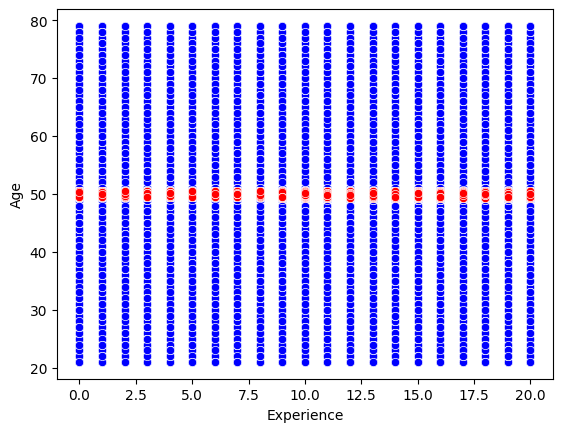

In [ ]:
sns.scatterplot(x='Experience',y='Age',color='blue',data=df_multiple)
sns.scatterplot(x='Experience',y='Predicciones_Age',color='red',data=df_multiple)

In [ ]:
coef_deter=model_1.score(X=var_indep,y=var_dep)
print("El coefienciente de determinación es:",coef_deter)

coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 0.000419254135800462
El coefienciente de correlación es: 0.020475696222606497


** Experience

In [ ]:
#Se define varieble dependiente e independiente
#Areglo de vectores
var_indep=df_multiple[['Income','Age', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
var_dep=df_multiple[['Experience']]

In [ ]:
#Se genera modelo
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

#Ajustamos modelo
model_1.fit(X=var_indep,y=var_dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -119.60460679,  1570.49372642,  3901.45155326, -5146.0166579 ]),
 'rank_': 4,
 'singular_': array([8565.98351382, 3284.56484425, 1281.99339764,  701.97671005]),
 'intercept_': 5024283.389913392}

Modelo matemático Variable Dependiente 'Experience'

y= -119.60460679x1 +  1570.49372642x2 +  3901.45155326x3 + -5146.0166579 x4 + 5024283.389913392

In [ ]:
y_pred=model_1.predict(X=df_multiple[['Income','Age', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([[ 6.61373317],
       [13.00502443],
       [ 7.45117871],
       ...,
       [10.79399371],
       [ 3.22439767],
       [10.72580621]])

In [ ]:
#Insertamos las predicciones del modelo en el df original
df_multiple.insert(0,'Predicciones_Experience',y_pred)
df_multiple.head(5)

,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,
1,6.613733,49.726491,4.971050e+06,1303834,23,3,3,13,0
2,13.005024,49.757166,5.003419e+06,7574516,40,10,9,13,0
3,7.451179,50.461538,4.986817e+06,3991815,66,4,4,10,0
4,5.488537,49.939413,4.968571e+06,6256451,41,2,2,12,1
5,6.680789,49.377210,4.975598e+06,5768871,47,11,3,14,1


<Axes: xlabel='Income', ylabel='Experience'>

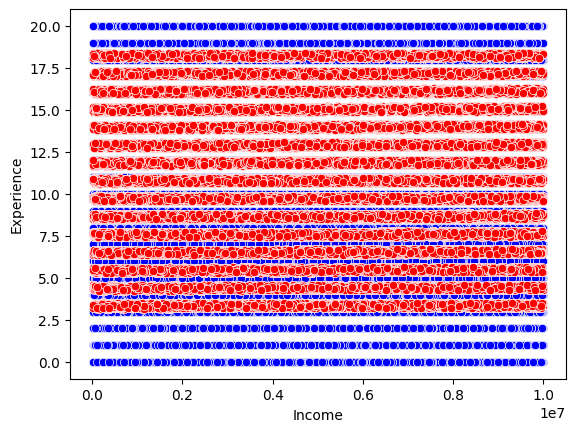

In [ ]:
sns.scatterplot(x='Income',y='Experience',color='blue',data=df_multiple)
sns.scatterplot(x='Income',y='Predicciones_Experience',color='red',data=df_multiple)

In [ ]:
coef_deter=model_1.score(X=var_indep,y=var_dep)
print("El coefienciente de determinación es:",coef_deter)

coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 0.4177012934333134
El coefienciente de correlación es: 0.6462981459305863


** CURRENT_JOB_YRS

In [ ]:
#Se define varieble dependiente e independiente
#Areglo de vectores
var_indep=df_multiple[['Income','Age', 'Experience', 'CURRENT_HOUSE_YRS']]
var_dep=df_multiple[['CURRENT_JOB_YRS']]

In [ ]:
#Se genera modelo
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

#Ajustamos modelo
model_1.fit(X=var_indep,y=var_dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -119.60460679,  1570.49372642,  3901.45155326, -5146.0166579 ]),
 'rank_': 4,
 'singular_': array([8565.98351382, 3284.56484425, 1281.99339764,  701.97671005]),
 'intercept_': 5024283.389913392}

Modelo matemático Variable Dependiente 'CURRENT_JOB_YRS'

y= -119.60460679x1 +  1570.49372642x2 +  3901.45155326x3 + -5146.0166579 x4 + 5024283.389913392

In [ ]:
y_pred=model_1.predict(X=df_multiple[['Income','Age', 'Experience', 'CURRENT_HOUSE_YRS']])
y_pred

array([[3.50467578],
       [6.2859037 ],
       [3.98735222],
       ...,
       [5.11875209],
       [2.41373053],
       [9.094038  ]])

In [ ]:
#Insertamos las predicciones del modelo en el df original
df_multiple.insert(0,'Predicciones_CURRENT_JOB_YRS',y_pred)
df_multiple.head(5)

,Predicciones_CURRENT_JOB_YRS,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,
1,3.504676,6.613733,49.726491,4.971050e+06,1303834,23,3,3,13,0
2,6.285904,13.005024,49.757166,5.003419e+06,7574516,40,10,9,13,0
3,3.987352,7.451179,50.461538,4.986817e+06,3991815,66,4,4,10,0
4,3.159009,5.488537,49.939413,4.968571e+06,6256451,41,2,2,12,1
5,6.657676,6.680789,49.377210,4.975598e+06,5768871,47,11,3,14,1


<Axes: xlabel='Experience', ylabel='CURRENT_JOB_YRS'>

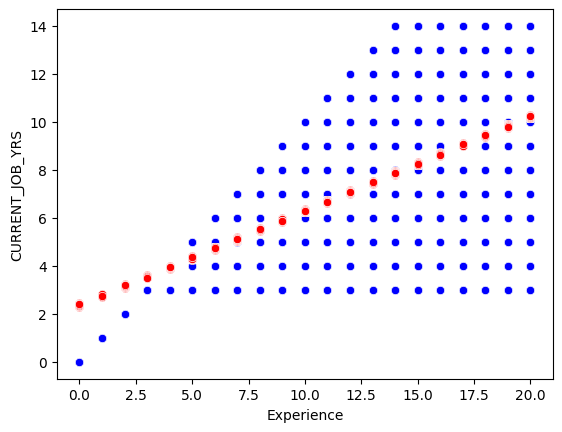

In [ ]:
sns.scatterplot(x='Experience',y='CURRENT_JOB_YRS',color='blue',data=df_multiple)
sns.scatterplot(x='Experience',y='Predicciones_CURRENT_JOB_YRS',color='red',data=df_multiple)

In [ ]:
coef_deter=model_1.score(X=var_indep,y=var_dep)
print("El coefienciente de determinación es:",coef_deter)

coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 0.4175082512923082
El coefienciente de correlación es: 0.6461487841761433


** CURRENT_HOUSE_YRS

In [ ]:
var_indep=df_multiple[['Income','Age', 'Experience', 'CURRENT_JOB_YRS']]
var_dep=df_multiple[['CURRENT_HOUSE_YRS']]

In [ ]:
#Se genera modelo
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

#Ajustamos modelo
model_1.fit(X=var_indep,y=var_dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -119.60460679,  1570.49372642,  3901.45155326, -5146.0166579 ]),
 'rank_': 4,
 'singular_': array([8565.98351382, 3284.56484425, 1281.99339764,  701.97671005]),
 'intercept_': 5024283.389913392}

Modelo matemático Variable Dependiente 'CURRENT_HOUSE_YRS'

y= -119.60460679x1 +  1570.49372642x2 +  3901.45155326x3 + -5146.0166579 x4 + 5024283.389913392

In [ ]:
y_pred=model_1.predict(X=df_multiple[['Income','Age', 'Experience', 'CURRENT_JOB_YRS']])
y_pred

array([[12.0173454 ],
       [11.99815915],
       [11.94497262],
       ...,
       [11.98230401],
       [11.96975587],
       [12.00045126]])

In [ ]:
#Insertamos las predicciones del modelo en el df original
df_multiple.insert(0,'Predicciones_CURRENT_HOUSE_YRS',y_pred)
df_multiple.head(12)

,Predicciones_CURRENT_HOUSE_YRS,Predicciones_CURRENT_JOB_YRS,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,
1,12.017345,3.504676,6.613733,49.726491,4.971050e+06,1303834,23,3,3,13,0
2,11.998159,6.285904,13.005024,49.757166,5.003419e+06,7574516,40,10,9,13,0
3,11.944973,3.987352,7.451179,50.461538,4.986817e+06,3991815,66,4,4,10,0
4,11.980012,3.159009,5.488537,49.939413,4.968571e+06,6256451,41,2,2,12,1
5,12.022957,6.657676,6.680789,49.377210,4.975598e+06,5768871,47,11,3,14,1
6,11.937980,2.389610,3.346959,49.914071,4.954876e+06,6915937,64,0,0,12,0
7,12.002831,7.872104,11.845733,49.952672,5.008793e+06,3954973,58,14,8,12,0
8,11.998710,3.101001,5.612175,49.468496,4.959236e+06,1706172,33,2,2,14,0
9,12.059467,9.061647,15.008230,50.216370,5.034421e+06,7566849,24,17,11,11,0


<Axes: xlabel='Age', ylabel='CURRENT_HOUSE_YRS'>

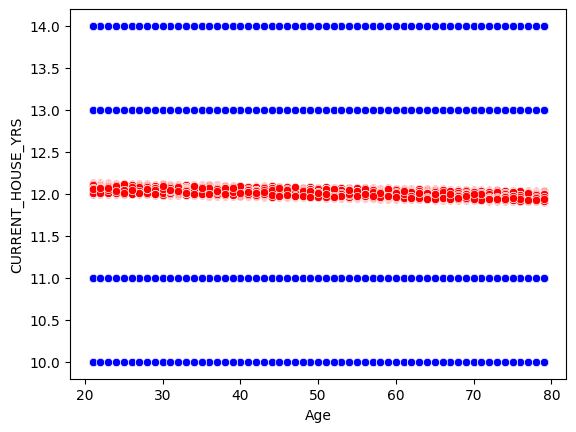

In [ ]:
sns.scatterplot(x='Age',y='CURRENT_HOUSE_YRS',color='blue',data=df_multiple)
sns.scatterplot(x='Age',y='Predicciones_CURRENT_HOUSE_YRS',color='red',data=df_multiple)

In [ ]:
coef_deter=model_1.score(X=var_indep,y=var_dep)
print("El coefienciente de determinación es:",coef_deter)

coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 0.0008688150174576137
El coefienciente de correlación es: 0.029475668227499332


** Risk_Flag

In [ ]:
#Se define varieble dependiente e independiente
#Areglo de vectores
var_indep=df_multiple[['Income','Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
var_dep=df_multiple[['Risk_Flag']]

In [ ]:
#Se genera modelo
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

#Ajustamos modelo
model_1.fit(X=var_indep,y=var_dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -119.60460679,  1570.49372642,  3901.45155326, -5146.0166579 ]),
 'rank_': 4,
 'singular_': array([8565.98351382, 3284.56484425, 1281.99339764,  701.97671005]),
 'intercept_': 5024283.389913392}

Modelo matemático Variable Dependiente 'Risk_Flag'

y=  -119.60460679x1 +  1570.49372642x2 +  3901.45155326x3 -5146.0166579x4 +  5024283.389913392


In [ ]:
y_pred=model_1.predict(X=df_multiple[['Income','Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([[0.14755186],
       [0.12779993],
       [0.1299873 ],
       ...,
       [0.13220977],
       [0.14353387],
       [0.09938137]])

In [ ]:
#Insertamos las predicciones del modelo en el df original
df_multiple.insert(0,'Predicciones_Risk_Flag',y_pred)
df_multiple.head(5)

,Predicciones_Risk_Flag,Predicciones_CURRENT_HOUSE_YRS,Predicciones_CURRENT_JOB_YRS,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,0.147552,12.017345,3.504676,6.613733,49.726491,4.971050e+06,1303834,23,3,3,13,0
2,0.127800,11.998159,6.285904,13.005024,49.757166,5.003419e+06,7574516,40,10,9,13,0
3,0.129987,11.944973,3.987352,7.451179,50.461538,4.986817e+06,3991815,66,4,4,10,0
4,0.140632,11.980012,3.159009,5.488537,49.939413,4.968571e+06,6256451,41,2,2,12,1
5,0.117255,12.022957,6.657676,6.680789,49.377210,4.975598e+06,5768871,47,11,3,14,1


<Axes: xlabel='Age', ylabel='Risk_Flag'>

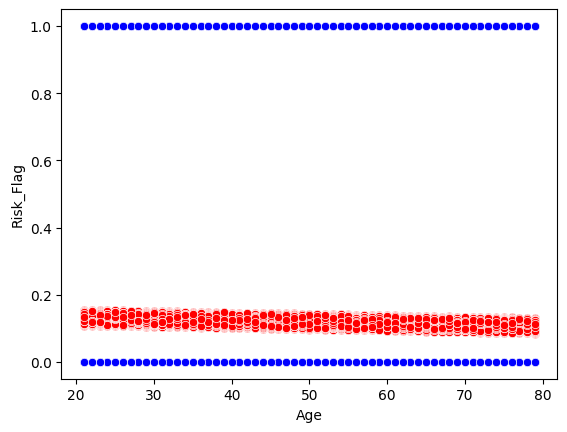

In [ ]:
sns.scatterplot(x='Age',y='Risk_Flag',color='blue',data=df_multiple)
sns.scatterplot(x='Age',y='Predicciones_Risk_Flag',color='red',data=df_multiple)

In [ ]:
coef_deter=model_1.score(X=var_indep,y=var_dep)
print("El coefienciente de determinación es:",coef_deter)

coef_corre=np.sqrt(coef_deter)
print("El coefienciente de correlación es:",coef_corre)

El coefienciente de determinación es: 0.0017448954344837508
El coefienciente de correlación es: 0.04177194554343562


 7.Proponer un modelo no lineal para predecir cada variable numérica del dataframe: (Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS y Risk_Flag), y comparar los coeficientes obtenidos con respecto a los coeficientes obtenidos en los modelos lineales, generar un análisis comparativo a través de una gráfica.

In [ ]:
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Crear una copia del dataframe para realizar la propuesta de modelo no lineal
df_nolineal=df2_numeric.copy()
df_nolineal.head(5)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,
1,1303834,23,3,3,13,0
2,7574516,40,10,9,13,0
3,3991815,66,4,4,10,0
4,6256451,41,2,2,12,1
5,5768871,47,11,3,14,1


In [ ]:
df_nolineal.isnull().sum()

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

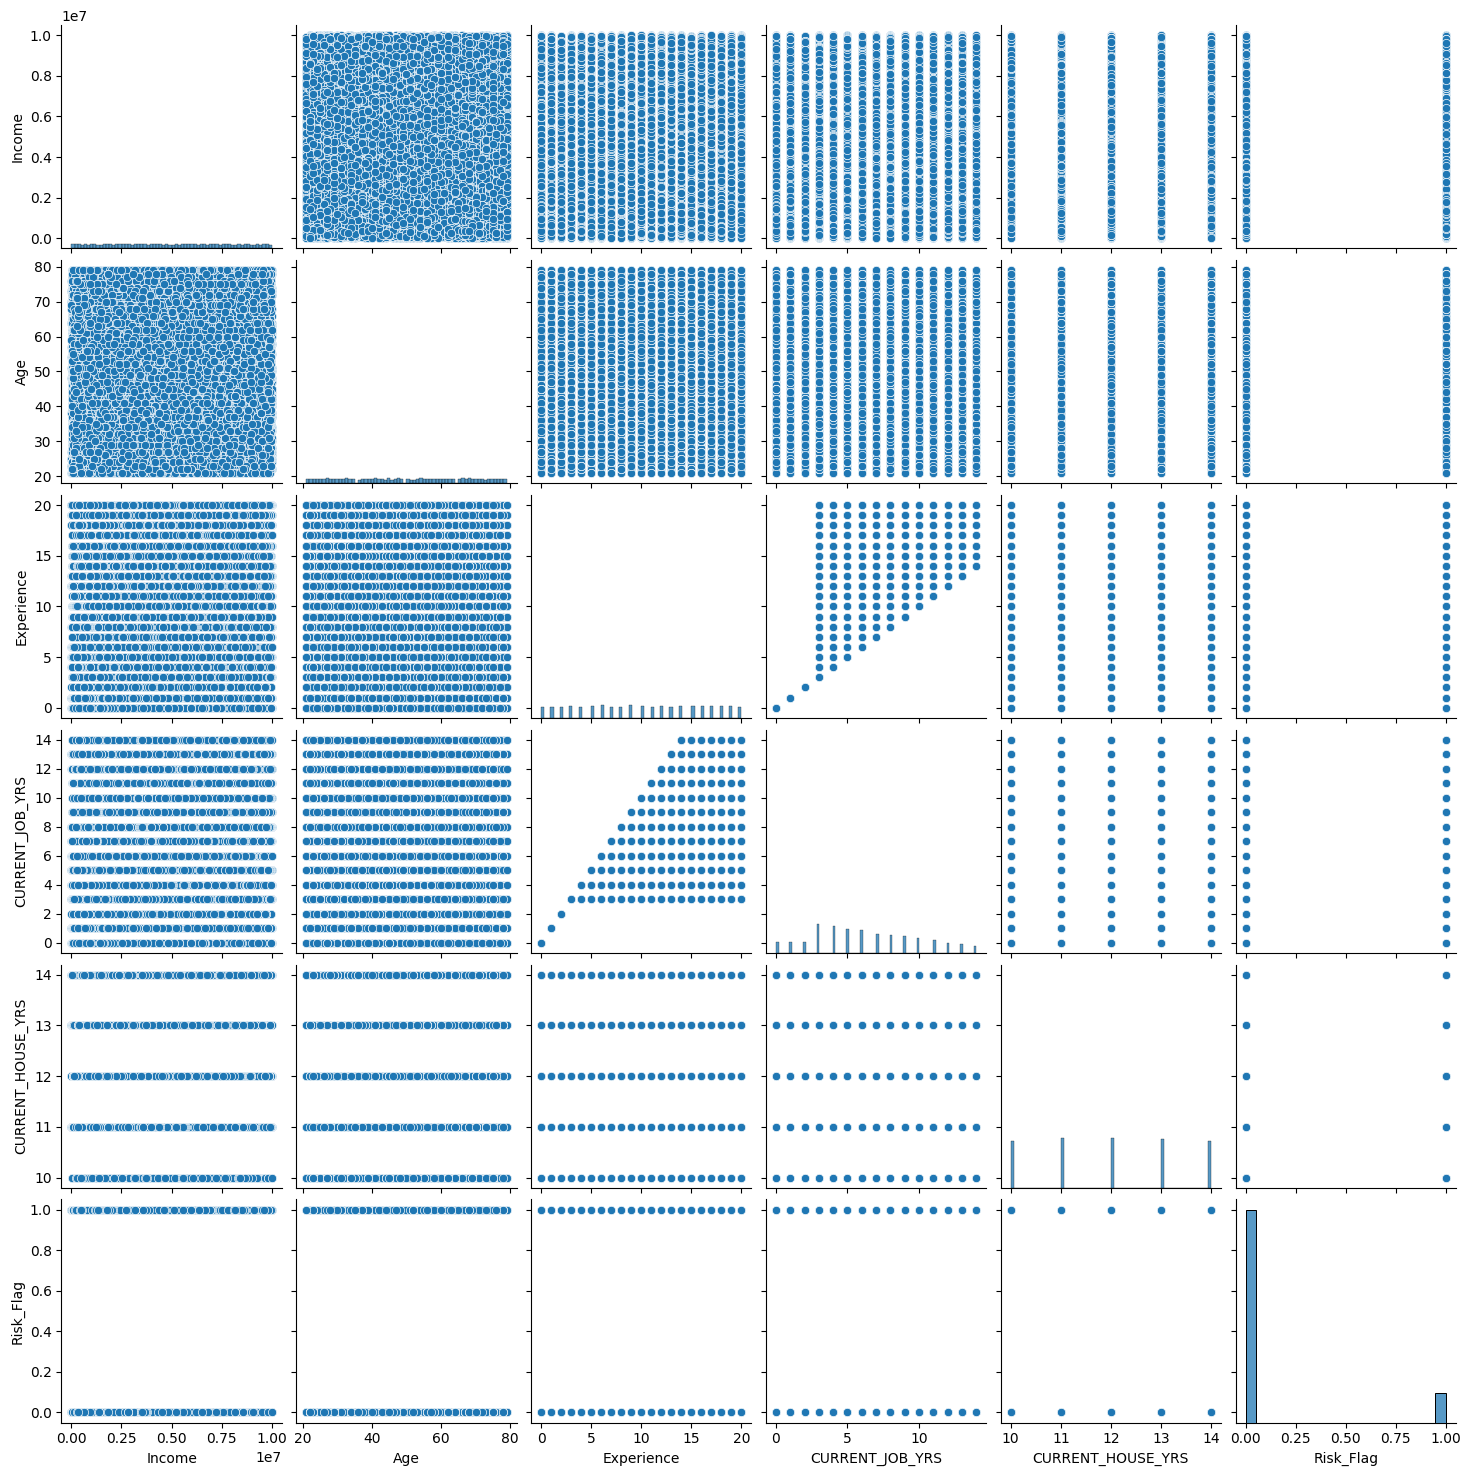

In [ ]:
sns.pairplot(df_nolineal)

Variable 'Income'

In [ ]:
Vars_Indep= df_nolineal[['Experience']]
Var_Dep= df_nolineal['Income']
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a * np.log(x + 1)

parametros, covs= curve_fit(func1, df_nolineal['Experience'], df_nolineal['Income'])
parametros

array([2.03501779e+06, 1.00000000e+00, 1.00000000e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df_nolineal['Experience'], df_nolineal['Income'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.log(x + 1)

In [ ]:
yfit1

,Experience
Id,
1,2.821134e+06
2,4.879760e+06
3,3.275235e+06
4,2.235696e+06
5,5.056829e+06
...,...
251996,5.370529e+06
251997,4.879760e+06
251998,4.231701e+06


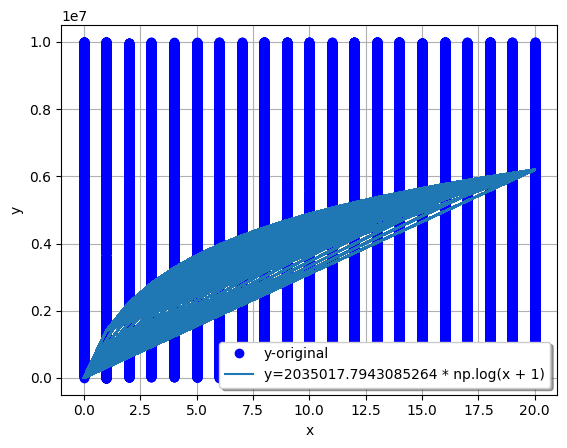

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=" f"{a} * np.log(x + 1)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

-0.338325249438135

In [ ]:
# Calcula el coeficiente de correlación (r) a partir de R cuadrado
coef_corre = np.sqrt(np.abs(R2))
print("El coeficiente de correlación es:", coef_corre)

El coeficiente de correlación es: 0.5816573299100898


Variable 'Age'

In [ ]:
Vars_Indep= df_nolineal[['Experience']]
Var_Dep= df_nolineal['Age']
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a * np.log(x + 1)

parametros, covs= curve_fit(func1, df_nolineal['Experience'], df_nolineal['Age'])
parametros

array([20.31993039,  1.        ,  1.        ])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df_nolineal['Experience'], df_nolineal['Age'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.log(x + 1)

In [ ]:
yfit1

,Experience
Id,
1,28.169405
2,48.725065
3,32.703666
4,22.323725
5,50.493130
...,...
251996,53.625461
251997,48.725065
251998,42.254107


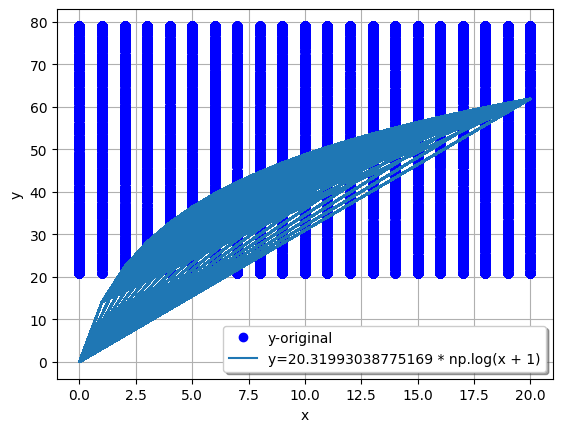

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=" f"{a} * np.log(x + 1)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

-0.9793703522453157

In [ ]:
coef_corre = np.sqrt(np.abs(R2))
print("El coeficiente de correlación es:", coef_corre)

El coeficiente de correlación es: 0.9896314224221641


Variable 'Experience'

In [ ]:
Vars_Indep= df_nolineal[['CURRENT_JOB_YRS']]
Var_Dep= df_nolineal['Experience']
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a * (x**b)

parametros, covs= curve_fit(func1, df_nolineal['CURRENT_JOB_YRS'], df_nolineal['Experience'])
parametros

array([3.78864277, 0.56387016, 1.        ])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df_nolineal['CURRENT_JOB_YRS'], df_nolineal['Experience'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * (x**b)

In [ ]:
yfit1

,CURRENT_JOB_YRS
Id,
1,7.039116
2,13.078337
3,8.278799
4,5.600483
5,7.039116
...,...
251996,10.405427
251997,10.405427
251998,11.350349


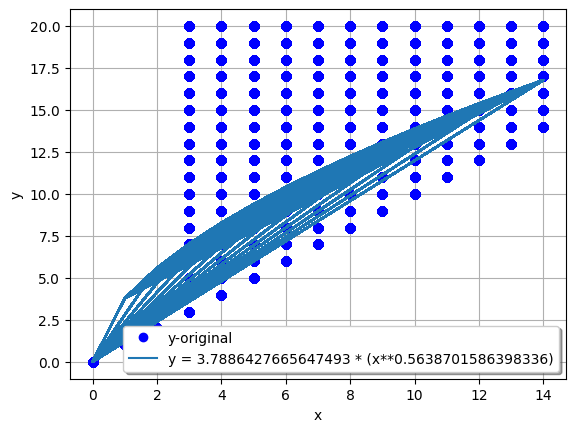

In [ ]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y ="f" {a} * (x**" f"{b})")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

0.4551937343316026

In [ ]:
coef_corre = np.sqrt(np.abs(R2))
print("El coeficiente de correlación es:", coef_corre)

El coeficiente de correlación es: 0.674680468319339


Variable 'Current_job_yrs'

In [ ]:
Vars_Indep= df_nolineal[['Experience']]
Var_Dep= df_nolineal['CURRENT_JOB_YRS']
x = Vars_Indep.values.flatten()  # Convertir a un array numpy 1D
y = Var_Dep.values

In [ ]:
def func1(x, a, b):
    return a * np.abs(x) + b

parametros, _ = curve_fit(func1, x, y)
a, b = parametros[0], parametros[1]
parametros

array([0.39255587, 2.37517222])

In [ ]:
yfit1 = a * np.abs(x) + b

In [ ]:
yfit1

array([3.55283983, 6.30073093, 3.9453957 , ..., 5.12306332, 2.37517222,
       9.04862203])

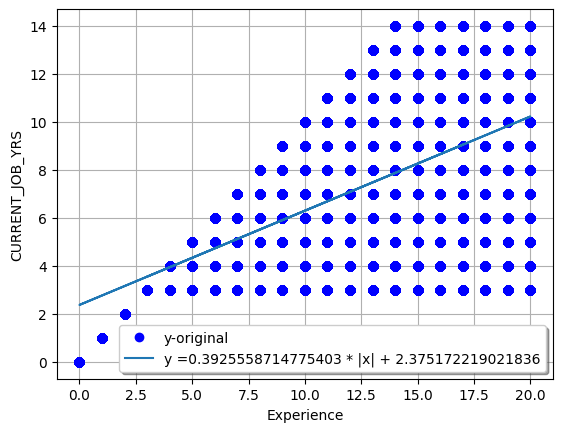

In [ ]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y ="f"{a} * |x| + {b}")
plt.xlabel('Experience')
plt.ylabel('CURRENT_JOB_YRS')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

0.4174420012200908

In [ ]:
coef_corre = np.sqrt(np.abs(R2))
print("El coeficiente de correlación es:", coef_corre)

El coeficiente de correlación es: 0.6460975168038419


Variable 'Current_house_yrs'

In [ ]:
Vars_Indep= df_nolineal[['Age']]
Var_Dep= df_nolineal['CURRENT_HOUSE_YRS']
x = Vars_Indep.values.flatten()  # Convertir a un array numpy 1D
y = Var_Dep.values

In [ ]:
def func1(x, a, b):
    return a * np.log(x + 1)

parametros, _ = curve_fit(func1, x, y)
a, b = parametros[0], parametros[1]
parametros

array([3.07344713, 1.        ])

In [ ]:
yfit1 = a * np.log(x + 1)
yfit1

array([ 9.76758041, 11.41346739, 12.92290044, ..., 11.83322508,
       11.76712689, 13.10112121])

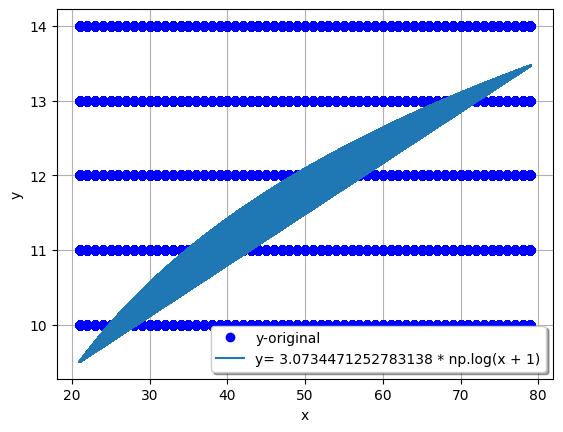

In [ ]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y= "f"{a} * np.log(x + 1)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

-0.6896908317045294

In [ ]:
coef_corre = np.sqrt(np.abs(R2))
print("El coeficiente de correlación es:", coef_corre)

El coeficiente de correlación es: 0.8304762679959792


Variable 'Risk_Flag'

In [ ]:
Vars_Indep = df_nolineal[['Experience']]
Var_Dep = df_nolineal['Risk_Flag']
x = Vars_Indep.values.flatten()  # Convertir a un array numpy 1D
y = Var_Dep.values

In [ ]:
def func_logaritmica(x, a):
    return a * np.log(x + 1)

parametros, _ = curve_fit(func_logaritmica, x, y)
a = parametros[0]
parametros

array([0.04824648])

In [ ]:
yfit1 = a * np.log(x + 1)

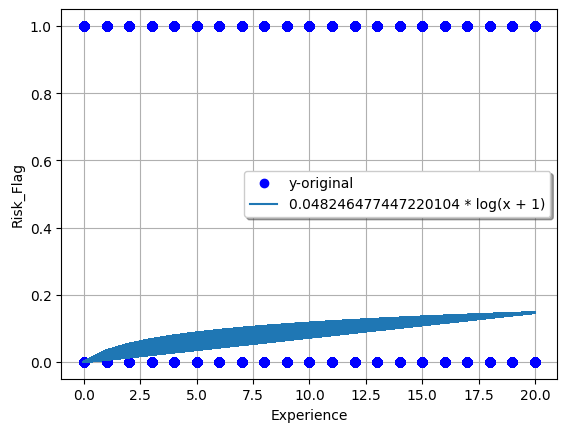

In [ ]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label=f"{a} * log(x + 1)")
plt.xlabel('Experience')
plt.ylabel('Risk_Flag')
plt.legend(fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

-0.024740237788815733

In [ ]:
coef_corre = np.sqrt(np.abs(R2))
print("El coeficiente de correlación es:", coef_corre)

El coeficiente de correlación es: 0.15729029782162576
